In [ ]:
###  加入 CBAM module (yolov7/models/commen.py & yolov7/models/yolo.py(找到 parse_model ) / 在cfg文件中添加CBAM信息，以添加到backbone为例，将Conv替换成CBAM即可，同样也可在FPN里替换

### https://avoid.overfit.cn/post/d0480632adbf49a79f2d975984da248b

In [3]:
#pip install wandb

  Using cached wandb-0.16.6-py3-none-any.whl.metadata (10 kB)
  Using cached sentry_sdk-1.45.0-py2.py3-none-any.whl.metadata (9.9 kB)
  Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl.metadata (1.8 kB)
  Using cached setproctitle-1.3.3-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (9.9 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl.metadata (9.0 kB)
Using cached wandb-0.16.6-py3-none-any.whl (2.2 MB)
Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
Using cached docker_pycreds-0.4.0-py2.py3-none-any.whl (9.0 kB)
Using cached sentry_sdk-1.45.0-py2.py3-none-any.whl (267 kB)
Using cached setproctitle-1.3.3-cp311-cp311-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (31 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
#pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
#pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [4]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [5]:
import torch

In [6]:
print(torch.cuda.device_count())

1


In [7]:
import os

from pathlib import Path
import json

# **Project: Small Object Detection**

Slides: https://docs.google.com/presentation/d/1qOtIDqFw0LaHhjILk_L95o57rVhY9YVye3NSec3BHzw

Objectives:
* Use YOLOv7 to practice the small object detection task.
* Get familiar with the network architecture of YOLOv7.

If any questions, please contact the TA via email:
* Hung-Shuo Chang: jonathanc@iis.sinica.edu.tw

## **Introduction**

Small object detection

# **Environment Checking**

Please make sure your **Notebook options > ACCELERATOR** is **GPU** or **TPU**.

See **Supplementary 1**

Check GPU by using the following command:

In [8]:
!nvidia-smi

Thu Apr 18 13:33:10 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 545.23.08              Driver Version: 545.23.08    CUDA Version: 12.3     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A30                     On  | 00000000:A2:00.0 Off |                    0 |
| N/A   42C    P0              51W / 165W |     18MiB / 24576MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

# **Setup YOLOv7**

This section is used to setup YOLOv7 and its environment.

## **Download Project**

We use [WongKinYiu/yolov7](https://github.com/WongKinYiu/yolov7.git), which is developed by one of the authors, Dr.Chien-Yao Wang. He is also an assistant researcher at the Institute of Information Science, Academia Sinica.

Use `git clone` command for download project from github.

!git clone https://github.com/WongKinYiu/yolov7.git

## **Install Required Packages**

%cd yolov7
%pip install -r requirements.txt

## **Download Pre-trained Weight**

!wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7_training.pt

# **Dataset**

[SkyFusion: Aerial Object Detection](https://www.kaggle.com/datasets/kailaspsudheer/tiny-object-detection)

Use **Data > + Add Data** to add **SkyFusion: Aerial Object Detection**.

See **Supplementary 2**

## **Preprocess Data**

Convert data to YOLO format.

Move images and annotations by using the following command:

# copy dataset to data folder
#%cp -r /small-object-detection-01/SkyFusion ./data #不用做，已經載好到jupyter上了

# create "images" folder and move all *.jpg files into it 

%mkdir /home/hylee/small-object-detection-01/SkyFusion/train/images
%mv /home/hylee/small-object-detection-01/SkyFusion/train/*.jpg /home/hylee/small-object-detection-01/SkyFusion/train/images

%mkdir /home/hylee/small-object-detection-01/SkyFusion/valid/images
%mv /home/hylee/small-object-detection-01/SkyFusion/valid/*.jpg /home/hylee/small-object-detection-01/SkyFusion/valid/images

%mkdir /home/hylee/small-object-detection-01/SkyFusion/test/images
%mv /home/hylee/small-object-detection-01/SkyFusion/test/*.jpg /home/hylee/small-object-detection-01/SkyFusion/test/images


# create "annotations" folder and move all *.json file into it
%mkdir /home/hylee/small-object-detection-01/SkyFusion/annotations #路徑一定要從root開始寫起

%mv /home/hylee/small-object-detection-01/SkyFusion/train/_annotations.coco.json /home/hylee/small-object-detection-01/SkyFusion/annotations/train.json
%mv /home/hylee/small-object-detection-01/SkyFusion/valid/_annotations.coco.json /home/hylee/small-object-detection-01/SkyFusion/annotations/valid.json
%mv /home/hylee/small-object-detection-01/SkyFusion/test/_annotations.coco.json /home/hylee/small-object-detection-01/SkyFusion/annotations/test.json

Check data format by using the following code:

In [9]:
import json

# read a json file for example
with open('/home/hylee/small-object-detection-01/SkyFusion/annotations/test.json', 'r') as f:
    json_data = json.load(f)

# print the keys of the json file
print('Keys of the json file: ', json_data.keys())

# print categories for example
print('Categories: ', json_data['categories'])

# print an image for example
print('Content of an image: ', json_data['images'][0])

# print the content of an annotation for example
print('Content of an annotation: ', json_data['annotations'][0])

Keys of the json file:  dict_keys(['info', 'licenses', 'categories', 'images', 'annotations'])
Categories:  [{'id': 1, 'name': 'Aircraft'}, {'id': 2, 'name': 'ship'}, {'id': 3, 'name': 'vehicle'}]
Content of an image:  {'id': 0, 'license': 1, 'file_name': '3c027498a_png_jpg.rf.da3db5f98f9637aa4c5a2e0100855ea6.jpg', 'height': 640, 'width': 640, 'date_captured': '2023-12-20T13:55:24+00:00'}
Content of an annotation:  {'id': 0, 'image_id': 0, 'category_id': 2, 'bbox': [411, 566, 18.4, 10.4], 'area': 191.36, 'segmentation': [[429.6, 566.4, 411.2, 566.4, 411.2, 576.8, 429.6, 576.8, 429.6, 566.4]], 'iscrowd': 0}


These json files follow the format of [COCO dataset](https://cocodataset.org/#format-data).

There are 3 important information in these annotation files:
1. **categories**: classes, including id and name of each category
2. **imaegs**: attributes, including id, file name, height, and width of each image
3. **annotations**: each object has an annotation
    * image_id: corresponding image
    * category_id: corresponding category(class)
    * bbox: [x_min, y_min, width, height] of the bounding box

Create a yaml file for this dataset.

There are 3 cateegories: Aircraft, ship, and vehicle

In [10]:
!echo -e 'train: /home/hylee/small-object-detection-01/SkyFusion/train/images\nval: /home/hylee/small-object-detection-01/SkyFusion/valid/images\n\nnc: 3\nnames: ["Aircraft", "ship", "vehicle"]' > /home/hylee/small-object-detection-01/skyfusion.yaml  # write a yaml file
!head /home/hylee/small-object-detection-01/skyfusion.yaml  #display content

train: /home/hylee/small-object-detection-01/SkyFusion/train/images
val: /home/hylee/small-object-detection-01/SkyFusion/valid/images

nc: 3
names: ["Aircraft", "ship", "vehicle"]


Create YOLO labels from annotation files:

In [11]:
import json
from pathlib import Path

def convert_annotations(annotation_path, target_path):
    # create a new folder for labels
    p = Path(target_path).mkdir(parents = True, exist_ok = True)
    
    # read annotation
    # You can also use pycocotools for COCO format annotations
    with open(annotation_path, 'r') as j:
        json_data = json.load(j)
        
    # get the image attributes we will use to normalize and output labels
    imgs = {}
    for img in json_data['images']:
        imgs[img['id']] = {
            'file_name': Path(img['file_name']).stem,  # remove extension
            'height': img['height'], 
            'width': img['width'],
        }
        
    # create labels
    for annotation in json_data['annotations']:
        attributes = imgs[annotation['image_id']]  # get image attributes by using image id
        category_id = int(annotation['category_id']) - 1  # zero-based, -1 to match the class id
        x, y, w, h = annotation['bbox']  # get bounding box information
        label = [category_id, ((2 * x + w) / (2 * attributes['width'])) , ((2 * y + h) / (2 * attributes['height'])), (w / attributes['width']), (h / attributes['height'])]  # record and normalize
        
        # write labels
        file_name = attributes['file_name']
        with open(f'{target_path}/{file_name}.txt', 'a') as f:  # use 'a' for append
            f.write(' '.join(map(str, label)) + "\n")  # convert to string and write to file
        
    
for folder in ['train', 'valid']:  # convert order: train -> val, you can also add 'test' if you want to use it
    convert_annotations(
        annotation_path = f'/home/hylee/small-object-detection-01/SkyFusion/annotations/{folder}.json',  # annotation file
        target_path = f'/home/hylee/small-object-detection-01/SkyFusion/{folder}/labels',  # labels folder
    )

## **Modify Network**

Modify network architecture for small objects

### Network architecture: ###

https://arxiv.org/pdf/2207.02696.pdf

More detail: https://medium.com/@nahidalam/understanding-yolov7-neural-network-343889e32e4e

Model definition: yaml files under the **cfg** folder

In [12]:
!cat /home/hylee/small-object-detection-01/yolov7/cfg/training/yolov7.yaml  # display content

# parameters
nc: 80  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P3/8
  - [36,75, 76,55, 72,146]  # P4/16
  - [142,110, 192,243, 459,401]  # P5/32

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0

#   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2 
   [-1, 1, CBAM, [64, 3, 2]],  # 1-P1/2   
   
   [-1, 1, Conv, [64, 3, 1]],
   
#   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, CBAM, [128, 3, 2]],  # 3-P2/4 
   
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [

### Resolution examples:

See **Supplementary 3**

### How to find small/tiny objects? ###
1. dataset or data augmentation for small objects
2. increase image resolution

and so on.

ref: https://en.wikipedia.org/wiki/Small_object_detection

### Modify Network Architecture ###

See **Supplementary 4**

In [13]:
!cp /home/hylee/small-object-detection-01/yolov7/cfg/training/yolov7.yaml /home/hylee/small-object-detection-01/yolov7/cfg/training/yolov7_small_object.yaml  # copy

In [14]:
# define P2
P2_layers = [
    '   #################### FPN P2 ####################\n', 
    '   [-1, 1, Conv, [128, 1, 1]],\n', 
    '   [-2, 1, Conv, [128, 1, 1]],\n', 
    '   [-1, 1, Conv, [64, 3, 1]],\n', 
    '   [-1, 1, Conv, [64, 3, 1]],\n', 
    '   [-1, 1, Conv, [64, 3, 1]],\n', 
    '   [-1, 1, Conv, [64, 3, 1]],\n', 
    '   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],\n', 
    '   [-1, 1, Conv, [128, 1, 1]], # 75\n', 
    '\n', 
    '   [-1, 1, Conv, [64, 1, 1]],\n', 
    "   [-1, 1, nn.Upsample, [None, 2, 'nearest']],\n", 
    '   [11, 1, Conv, [64, 1, 1]], # route backbone P2\n', 
    '   [[-1, -2], 1, Concat, [1]], # 79\n', 
    '   #################### FPN P2 ####################\n', 
    '\n', 
    '   #################### PAN P2 ####################\n', 
    '   [-1, 1, Conv, [64, 1, 1]],\n', 
    '   [-2, 1, Conv, [64, 1, 1]],\n', 
    '   [-1, 1, Conv, [32, 3, 1]],\n', 
    '   [-1, 1, Conv, [32, 3, 1]],\n', 
    '   [-1, 1, Conv, [32, 3, 1]],\n', 
    '   [-1, 1, Conv, [32, 3, 1]],\n', 
    '   [[-1, -2, -3, -4, -5, -6], 1, Concat, [1]],\n', 
    '   [-1, 1, Conv, [64, 1, 1]], # 87\n', 
    '\n', 
    '   [-1, 1, MP, []],\n', 
    '   [-1, 1, Conv, [64, 1, 1]],\n', 
    '   [-3, 1, Conv, [64, 1, 1]],\n', 
    '   [-1, 1, Conv, [64, 3, 2]],\n', 
    '   [[-1, -3, 75], 1, Concat, [1]],  # 92\n', 
    '   #################### PAN P2 ####################\n'
    '\n', 
]

In [15]:
# read yaml file
with open('/home/hylee/small-object-detection-01/yolov7/cfg/training/yolov7_small_object.yaml', 'r') as f:
    lines = f.readlines()

# add P2 layers and remove P5 layers
lines = lines[: 95] + P2_layers + lines[95 : 119] + lines[134 :]
    
# modify content for correct layers
## parameters and anchors ##
lines[1] = lines[1].replace('80', '3')  # number of class from 80 to 3
lines[7] = lines[7].replace('P3/8', 'P2/4')  # modify comment, move anchor from P3 to P2
lines[8] = lines[8].replace('P4/16', 'P3/8')  # modify comment, move anchor from P4 to P3
lines[9] = lines[9].replace('P5/32', 'P4/16')  # modify comment, move anchor from P5 to P4

## head ##
lines[134] = lines[134].replace('75', '100')  # layer number change: from 75 to 100
lines[149] = lines[149].replace('88', '113')  # layer number change: from 88 to 113

## RepConv ##
lines[151] = lines[151].replace('75', '87').replace('256', '128')  # from layer number change: from 75 to 87. RepConv change: 256 to 128
lines[152] = lines[152].replace('88', '100').replace('512', '256')  # from layer number change: from 88 to 100. RepConv change: 512 to 256
lines[153] = lines[153].replace('101', '113').replace('1024', '512')  # from layer number change: from 101 to 113. RepConv change: 1024 to 512

lines[155] = lines[155].replace('102,103,104', '114, 115, 116').replace('P3, P4, P5', 'P2, P3, P4')  # concat all RepConv layers

# write yaml file
with open('/home/hylee/small-object-detection-01/yolov7/cfg/training/yolov7_small_object.yaml', 'w') as w:
    w.write(''.join(lines))

In [16]:
!cat /home/hylee/small-object-detection-01/yolov7/cfg/training/yolov7_small_object.yaml  # check

# parameters
nc: 3  # number of classes
depth_multiple: 1.0  # model depth multiple
width_multiple: 1.0  # layer channel multiple

# anchors
anchors:
  - [12,16, 19,36, 40,28]  # P2/4
  - [36,75, 76,55, 72,146]  # P3/8
  - [142,110, 192,243, 459,401]  # P4/16

# yolov7 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [32, 3, 1]],  # 0

#   [-1, 1, Conv, [64, 3, 2]],  # 1-P1/2 
   [-1, 1, CBAM, [64, 3, 2]],  # 1-P1/2   
   
   [-1, 1, Conv, [64, 3, 1]],
   
#   [-1, 1, Conv, [128, 3, 2]],  # 3-P2/4  
   [-1, 1, CBAM, [128, 3, 2]],  # 3-P2/4 
   
   [-1, 1, Conv, [64, 1, 1]],
   [-2, 1, Conv, [64, 1, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [-1, 1, Conv, [64, 3, 1]],
   [[-1, -3, -5, -6], 1, Concat, [1]],
   [-1, 1, Conv, [256, 1, 1]],  # 11
         
   [-1, 1, MP, []],
   [-1, 1, Conv, [128, 1, 1]],
   [-3, 1, Conv, [128, 1, 1]],
   [-1, 1, Conv, [128, 3, 2]],
   [[-1, -3], 1, Concat, [1]],  # 16-P3/8  
   [-1

# **Train Models**

Train models by using modified YOLOv7

### Disable WanDB

In [17]:
!wandb disabled

W&B disabled.


## Training

Use pre-trained model for transfer learning

import subprocess

subprocess.run(["sudo", "chmod", "-R", "777", "/home/hylee/small-object-detection-01/runs"], check=True)

In [24]:
#!sudo chmod -R 777 /home/hylee/small-object-detection-01/runs/train

In [18]:
!rm -rf runs/train
!python3 /home/hylee/small-object-detection-01/yolov7/train.py --img 640 --batch-size 12 --workers 8 --weights 'yolov7_training.pt' --cfg /home/hylee/small-object-detection-01/yolov7/cfg/training/yolov7_small_object.yaml --hyp /home/hylee/small-object-detection-01/yolov7/data/hyp.scratch.p5.yaml --data /home/hylee/small-object-detection-01/skyfusion.yaml --device 0 --epoch 1

2024-04-18 13:34:15.465351: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 13:34:15.505218: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.2+cu121 CUDA:0 (NVIDIA A30, 24061.1875MB)

Namespace(weights='yolov7_training.pt', cfg='/home/hylee/small-object-detection-01/yolov7/cfg/training/yolov7_small_object.yaml', data='/home/hylee/small-object-detection-01/skyfusion.yaml', hyp='/home/hylee/small-object-detection-01/yolov7/data/hyp.scratch.p5.yaml', epochs=1, batch_size=12, im

## Validation

Validate the model

In [45]:
!rm -rf runs/test
!python /home/hylee/small-object-detection-01/yolov7/test.py --img 640 --batch-size 12 --conf 0.001 --iou 0.65 --data /home/hylee/small-object-detection-01/yolov7/data/skyfusion.yaml --device 0 --weights runs/train/exp/weights/best.pt

Namespace(weights=['runs/train/exp/weights/best.pt'], data='/home/hylee/small-object-detection-01/yolov7/data/skyfusion.yaml', batch_size=12, img_size=640, conf_thres=0.001, iou_thres=0.65, task='val', device='0', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.2+cu121 CUDA:0 (NVIDIA A30, 24061.1875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/opt/conda/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 388 layers, 26563928 parameters, 1549184 gradients, 108.5 GFLOPS
 Conver

## Inference

Inference images by using the model

In [26]:
!python detect.py --weights runs/train/exp/weights/best.pt --conf 0.25 --source /home/hylee/small-object-detection-01/SkyFusion/test/images

Namespace(weights=['runs/train/exp/weights/best.pt'], source='/home/hylee/small-object-detection/SkyFusion/test/images', img_size=640, conf_thres=0.25, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.2+cu121 CUDA:0 (NVIDIA A30, 24061.1875MB)
                                            CUDA:1 (NVIDIA A30, 24061.1875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/opt/conda/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 344 layers, 26519056 parameters, 15

### Visualize ###

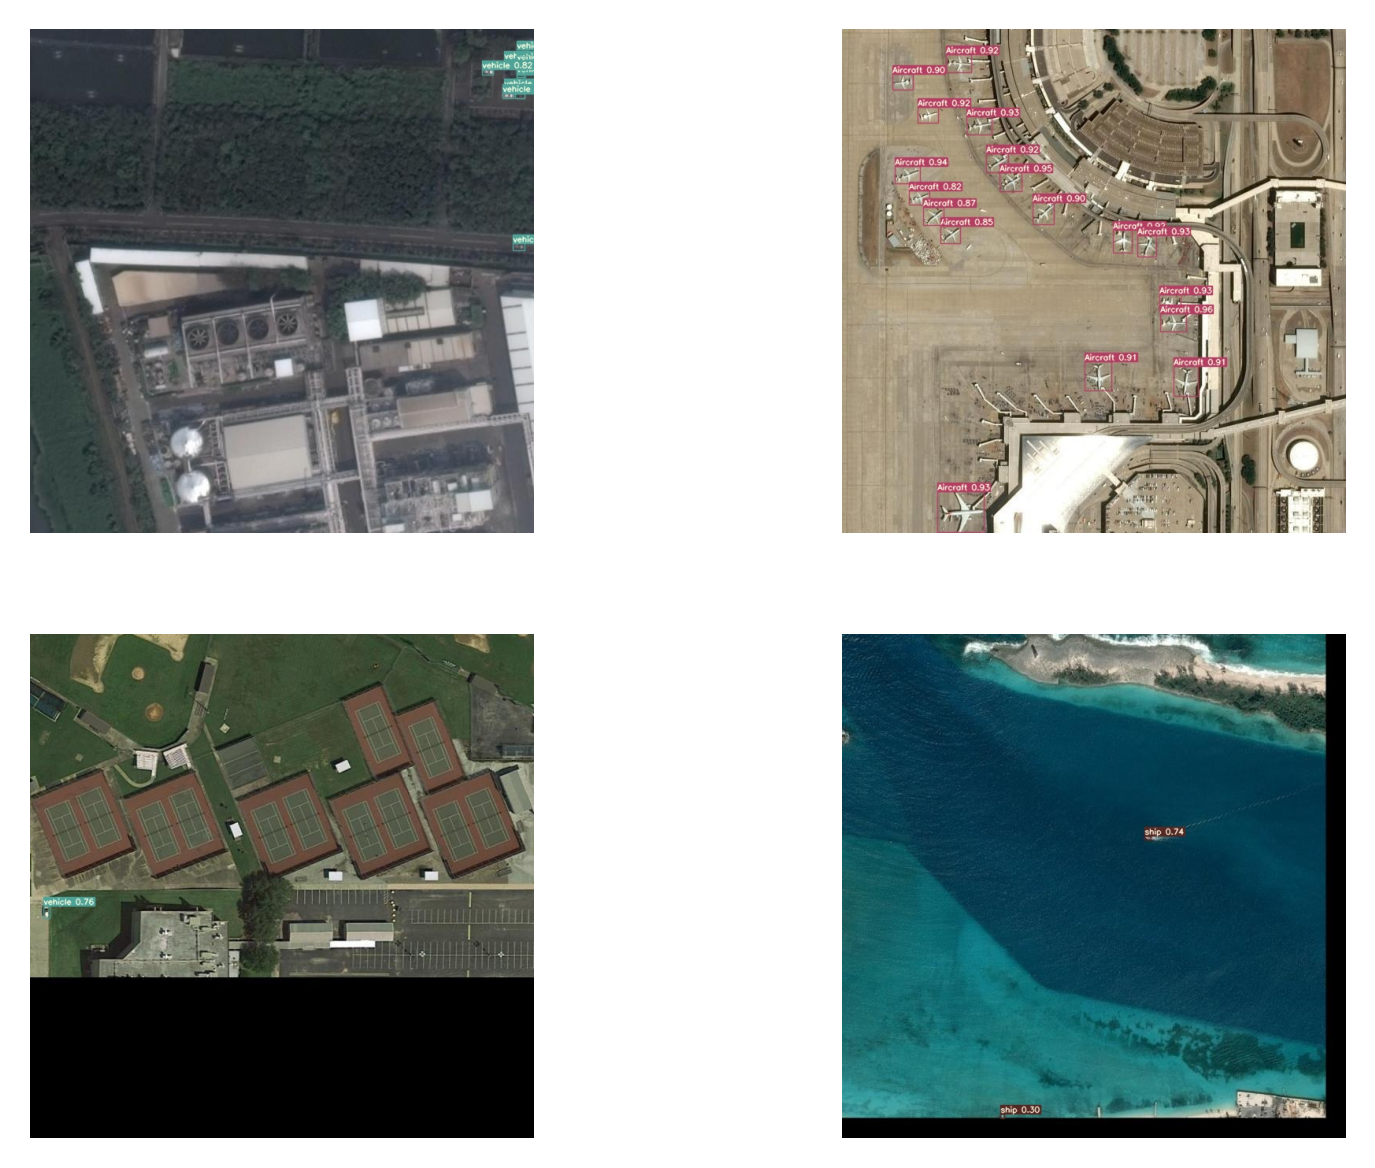

In [29]:
import cv2
from matplotlib import pyplot as plt
from os import listdir
from os.path import isfile, join

fig, ax = plt.subplots(2, 2)  # plot 2 x 2 images
fig.set_dpi(300)
base_path = 'runs/detect/exp'
images = [base_path + '/' + f for f in listdir(base_path) if isfile(join(base_path, f))]

for i in range(2):  # 0 - 2
    img1 = cv2.imread(images[2 * i], cv2.IMREAD_COLOR)  # read an image
    img2 = cv2.imread(images[(2 * i) + 1], cv2.IMREAD_COLOR)  # read another image

    ax[0][i].imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))  # set the first image to row 0
    ax[1][i].imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))  # set the second image to row 1

    ax[0][i].axis('off')  # set axis off
    ax[1][i].axis('off')  # set axis off

### How to Improve ###
1. Modify network
2. Adjust hypermeters
3. Add more data for training
4. Add some skills/methods

### Notice!! ###
If you don't want to train the model again, please remember to download it

See **Supplementary 5**

# **Challenge**

Challenge the leaderboard of Kaggle

Leaderboard: https://www.kaggle.com/t/d09c996c92ac4a728f40b83253b7c535


### Use Test Set
Download test set from the page of challenge and upload test set to this notebook

See **Supplementary 6**

# 要從 https://www.kaggle.com/competitions/nchu-ai-ds-small-object-detection/data 下載檔案下來再手動上傳到 主程式：https://www.kaggle.com/code/hsinylee/small-object-detection-01/ 

# copy testset to data folder
%cp -r /kaggle/input/testset ./data/ # 從 kaggle input路徑複製到 yolov7 資料夾裡面

### Modify detect.py ###

Output the results to .csv file

**Make sure your output matches the format of this challenge**

In [30]:
!cp detect.py detect_small_object.py  # copy 

In [31]:
header = [
    "    with open('output.csv', 'w') as f:\n",
    '        f.write("ID,bbox\\n")\n',
    '\n',
]

variable = [
    '        crd = []\n',
]

output = [
    '                    x_min, y_min, x_max, y_max = xyxy\n',
    "                    crd += [f'{x_min} {y_min} {x_max} {y_max}']\n",
    '\n',
    "        with open('output.csv', 'a') as f:\n",
    "            bbox = ' '.join(crd) if (0 < len(crd)) else '0'\n",
    '            f.write(f"{p.name},{bbox}\\n")\n',
    '\n',
]

In [32]:
# read detect_small_object.py
with open('detect_small_object.py', 'r') as f:
    lines = f.readlines()
    
lines = lines[: 68] + header + lines[68 : 99] + variable + lines[99 : 130] + output + lines[130 :]

# write detect_small_object.py
with open('detect_small_object.py', 'w') as w:
    w.write(''.join(lines))

In [33]:
!sed -n 68,141p detect_small_object.py # print & check the modified


    with open('output.csv', 'w') as f:
        f.write("ID,bbox\n")

    t0 = time.time()
    for path, img, im0s, vid_cap in dataset:
        img = torch.from_numpy(img).to(device)
        img = img.half() if half else img.float()  # uint8 to fp16/32
        img /= 255.0  # 0 - 255 to 0.0 - 1.0
        if img.ndimension() == 3:
            img = img.unsqueeze(0)

        # Warmup
        if device.type != 'cpu' and (old_img_b != img.shape[0] or old_img_h != img.shape[2] or old_img_w != img.shape[3]):
            old_img_b = img.shape[0]
            old_img_h = img.shape[2]
            old_img_w = img.shape[3]
            for i in range(3):
                model(img, augment=opt.augment)[0]

        # Inference
        t1 = time_synchronized()
        with torch.no_grad():   # Calculating gradients would cause a GPU memory leak
            pred = model(img, augment=opt.augment)[0]
        t2 = time_synchronized()

        # Apply NMS
        pred = non_max_suppression(pred, opt.conf_t

## Inference

Inference images by using the model

In [34]:
# read general.py
with open('utils/general.py', 'r') as f:
    lines = f.readlines()
    
lines[620] = lines[620].replace('300', '10000')  # to increase the maximum number of detections

# write detect_small_object.py
with open('utils/general.py', 'w') as w:
    w.write(''.join(lines))

In [35]:
!sed -n 618,626p utils/general.py  # print & check the modified


    # Settings
    min_wh, max_wh = 2, 4096  # (pixels) minimum and maximum box width and height
    max_det = 10000  # maximum number of detections per image
    max_nms = 30000  # maximum number of boxes into torchvision.ops.nms()
    time_limit = 10.0  # seconds to quit after
    redundant = True  # require redundant detections
    multi_label &= nc > 1  # multiple labels per box (adds 0.5ms/img)
    merge = False  # use merge-NMS


In [17]:
!python /home/hylee/small-object-detection-01/yolov7/detect_small_object.py --weights runs/train/exp/weights/best.pt --conf 0.25 --source /home/hylee/small-object-detection-01/testset/images --img-size 3200 --device 0 --name small_object_test --classes 2
# add "--classes 2" for detect only "vehicle" class

Namespace(weights=['runs/train/exp/weights/best.pt'], source='/home/hylee/small-object-detection/testset/images', img_size=3200, conf_thres=0.25, iou_thres=0.45, device='0', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=[2], agnostic_nms=False, augment=False, update=False, project='runs/detect', name='small_object_test', exist_ok=False, no_trace=False)
YOLOR 🚀 v0.1-128-ga207844 torch 2.2.2+cu121 CUDA:0 (NVIDIA A30, 24061.1875MB)

Fusing layers... 
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
RepConv.fuse_repvgg_block
IDetect.fuse
/opt/conda/lib/python3.11/site-packages/torch/functional.py:507: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3549.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 344 layers, 26519056 parameters, 1549184 gradients, 108.3 GFLOPS
 Convert model to Traced-model... 
 trac

### Upload Results
Leaderboard: https://www.kaggle.com/t/d09c996c92ac4a728f40b83253b7c535

See **Supplementary 7**

# **Report**

## **Deadline**

**2024/06/14**

## **Report Format**

**{Student1ID}\_{Student2ID}\_{Student3ID}\_{Student4ID}.zip** contents:
* at least one reporting document (*.doc or *.pdf)